In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import lux

In [48]:
data = pd.read_csv('diamonds.csv')

In [49]:
data.describe()
print(data.isnull().any())

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool


In [50]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

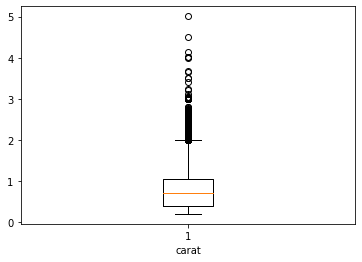

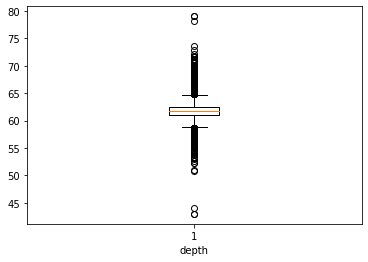

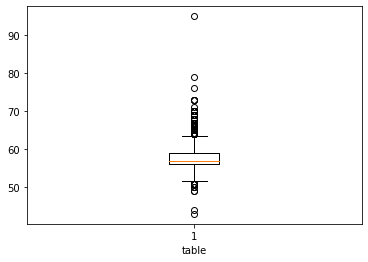

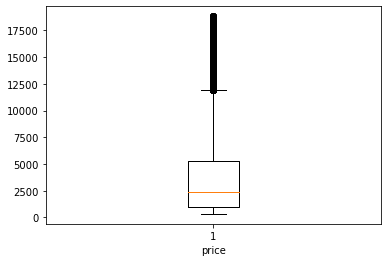

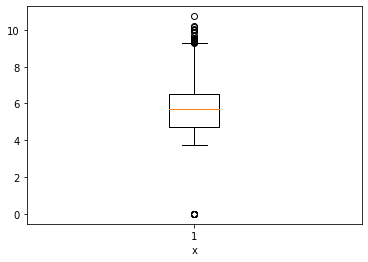

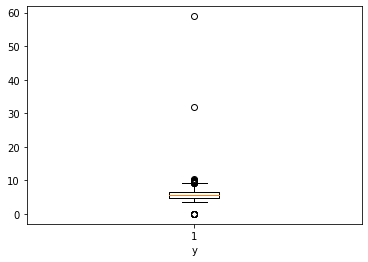

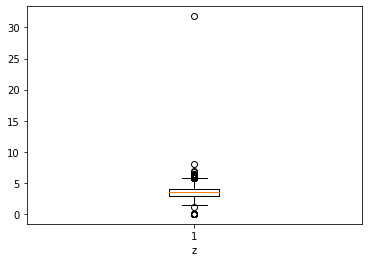

In [51]:
numerical_columns = ['carat','depth', 'table', 'price','x', 'y', 'z']
for i in numerical_columns:
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

In [52]:
data['color'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [53]:
data['color'].replace({'J':1, 'I':2, 'D':3, 'H':4, 'F':5, 'E':6, 'G':7}, inplace = True)
data['cut'].replace({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, inplace = True)
data['clarity'].replace({'I1':1, 'IF':2, 'VVS1':3, 'VVS2':4, 'VS1':5, 'SI2':6, 'VS2':7, 'SI1':8}, inplace = True)
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

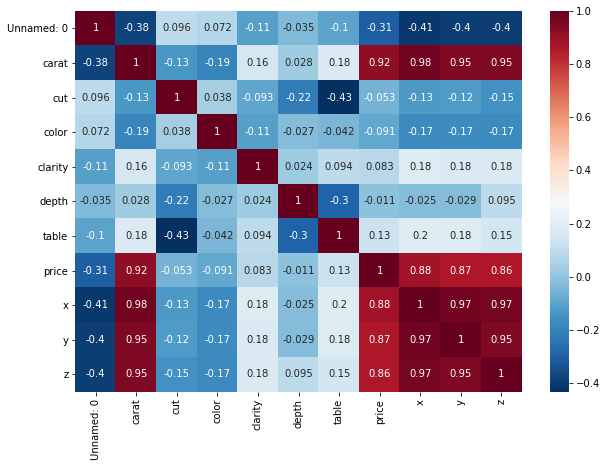

In [54]:
plt.figure(figsize = (10,7))
sb.heatmap(data.corr(), annot = True, cmap = 'RdBu_r' )

In [60]:
x = data.drop(columns= ['Unnamed: 0', 'price'])
y = data['price']

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [62]:
from sklearn.ensemble import RandomForestRegressor as RFC
RFC = RFC(n_estimators = 100, random_state = 0)
model = RFC.fit(x_train, y_train)

In [63]:
predictions = model.predict(x_test)
print(r2_score(predictions, y_test))

0.9804953070285671


In [65]:
from sklearn.metrics import mean_absolute_error as MSE
print(MSE(predictions, y_test)) 

270.5253273081201
